# National Health and Nutrition Examination Survey (NHANES): Effect of Depression on Sleep Quality

## Introdution

Documentation about depression questionaire: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/
Documentation about sleep problems:  https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SLQ_I.htm#SLQ120

We will use the data from the depression questionaire and sleep problem questionaire to try and determine a causal relationship between depression and sleep problems

## Depression questionaire
To clean our data, we removed individuals who had missing answers, refused, or didn't know for any of the questions except DPQ100, since DPQ100 doesn't contribute to the depression score in the PHQ-9.^1 We then sum the values of the answers to get an individuals depression score, stored in data frame depScore.

## Sleep problems
Since the required amount of sleep can vary grealy from person to person, we decided to characterize poor sleep by peoples answers to SLQ120: "How often feel overly sleepy during day?". We cleaned the data by eliminating missing, refused and don't know answers, then We characterized people who had 5 or more days of being overly sleepy as having sleep problems.

We assume random treatment assignment, so the observed risks equal the counterfactual risks.

Paper on depression: http://www.lphi.org/LPHIadmin/uploads/.PHQ-9-Review-Kroenke-63754.PDF

# Import libraries

In [5]:
if(!require(dplyr)){
    install.packages("dplyr", repos="https://cran.rstudio.org")
    library(dplyr)
}

if(!require(ggplot2)){
    install.packages("ggplot2", repos="https://cran.rstudio.org")
    library(ggplot2)
}

Loading required package: ggplot2


In [6]:
# Reading data files
cleanD = read.csv(file="../../../data/nhanes/2015_2016/questionaires/CleanD.csv")
cleanSleep = read.csv(file="../../../data/nhanes/2015_2016/questionaires/cleanSleep.csv")
depScore = cleanD[2]
depScore[2] = cleanD[3]

# Summing the depressions
for(i in 4:11) {depScore[2] = depScore[2] + cleanD[i]}

# Merging sleep and depression datasets for analysis
goodSleep = merge(cleanSleep, depScore, type="inner")
badSleep = merge(cleanSleep, depScore, type="inner")

# Select the poor and good sleepers
badSleep = badSleep %>% filter(SLQ120 > 2)
depRest = goodSleep %>% filter(SLQ120 < 3)

Now that we have separate data frames for people with good and bad sleep, we should look at histograms of the depression data for some exploratory data analysis.

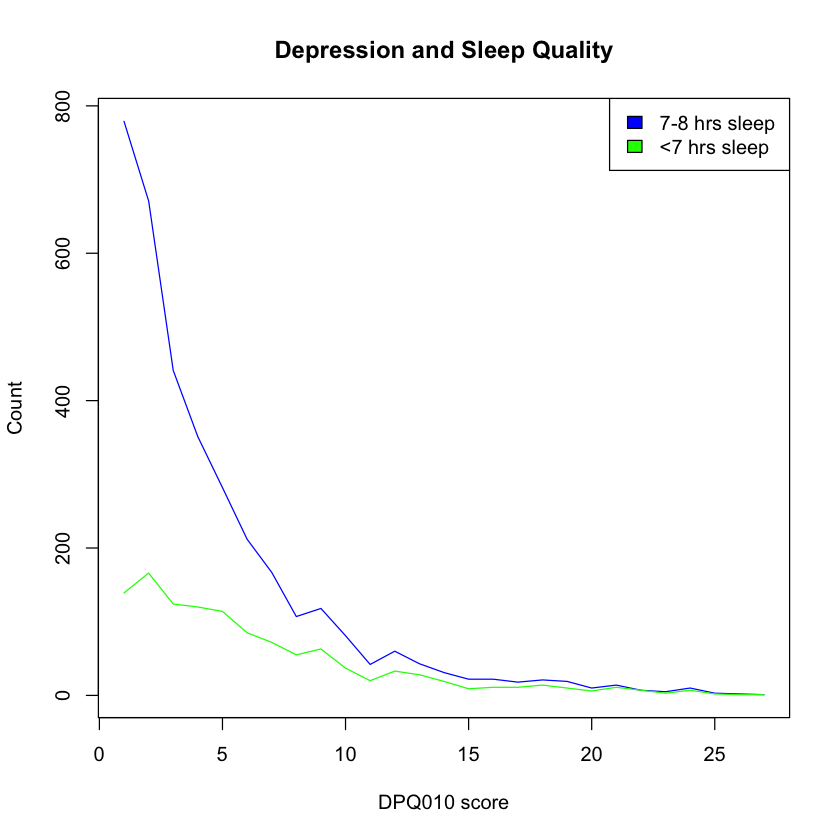

In [7]:
plot(count(goodSleep, DPQ010), xlab="DPQ010 score", ylab="Count", main="Depression and Sleep Quality", type="l", col="blue")
lines(count(badSleep, DPQ010), col="green")
legend("topright",
c("7-8 hrs sleep","<7 hrs sleep"),
fill=c("blue","green")
)

Comparing the two graphs, we see an interesting feature where they both seem to follow an exponential decay curve, but the histogram for the poor sleepers is much more erratic. Further data analysis is necessary, so we find the causal risk difference.

In [16]:
# filter by depression score
depSleepy = badSleep %>% filter(DPQ010 > 9)
hapSleepy = badSleep %>% filter(DPQ010 < 10)
depRest = goodSleep %>% filter(DPQ010 > 9)
hapRest = goodSleep %>% filter(DPQ010 < 10)

crd = nrow(depSleepy)/(nrow(depSleepy) + nrow(depRest)) - nrow(hapSleepy)/(nrow(hapSleepy) + nrow(hapRest))
sprintf("The causal risk difference is %f", crd)

[1] "The causal risk difference is 0.128121"